In [1]:
import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import netCDF4 as netcdf
from cartopy.util import add_cyclic_point

In [23]:
file = xr.open_dataset(os.path.join('../dados/CMC1/tmp2m.2015110100.01.CMC1.anom.avrg.1x1.nc'), decode_times=True)

In [27]:
print(file)

<xarray.Dataset>
Dimensions:  (height: 1, lat: 181, lon: 360, time: 8)
Coordinates:
  * time     (time) datetime64[ns] 2015-11-01 2015-11-01 ... 2015-11-01
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float32 90.0 89.0 88.0 87.0 86.0 ... -87.0 -88.0 -89.0 -90.0
  * height   (height) float64 2.0
Data variables:
    2t       (time, height, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version ?? (http://mpimet.mpg.de/cdi)
    Conventions:  CF-1.6
    history:      Sun Feb 03 13:43:06 2019: cdo -f nc copy /home/rod/Document...
    institution:  National Centers for Environmental Prediction
    CDO:          Climate Data Operators version 1.9.3 (http://mpimet.mpg.de/...


In [38]:
file = xr.open_dataset(os.path.join('../dados/CMC1/prate.2015110100.01.CMC1.anom.avrg.1x1.nc'), decode_times=True)

In [40]:
print(file['prate'][0,:,:])

<xarray.DataArray 'prate' (lat: 181, lon: 360)>
array([[ 1.2e-05,  1.2e-05,  1.2e-05, ...,  1.2e-05,  1.2e-05,  1.2e-05],
       [ 1.2e-05,  1.2e-05,  1.2e-05, ...,  1.2e-05,  1.2e-05,  1.2e-05],
       [ 1.3e-05,  1.3e-05,  1.3e-05, ...,  1.3e-05,  1.3e-05,  1.3e-05],
       ...,
       [-1.0e-06, -1.0e-06, -1.0e-06, ..., -1.0e-06, -1.0e-06, -1.0e-06],
       [-1.0e-06, -1.0e-06, -1.0e-06, ..., -1.0e-06, -1.0e-06, -1.0e-06],
       [-1.0e-06, -1.0e-06, -1.0e-06, ..., -1.0e-06, -1.0e-06, -1.0e-06]],
      dtype=float32)
Coordinates:
    time     datetime64[ns] 2015-11-01
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float32 90.0 89.0 88.0 87.0 86.0 ... -87.0 -88.0 -89.0 -90.0
Attributes:
    long_name:  Precipitation rate
    units:      kg m**-2 s**-1
    code:       59
    table:      2


In [41]:
lat = file['lat']
lon = file['lon']
var = file['prate'][0,:,:].squeeze()

In [32]:
var.shape

(181, 360)

In [26]:
#cvar, clon = add_cyclic_point(var.values, coord=lon, axis=1)

ValueError: The length of the coordinate does not match the size of the corresponding dimension of the data array: len(coord) = 360, data.shape[1] = 181.

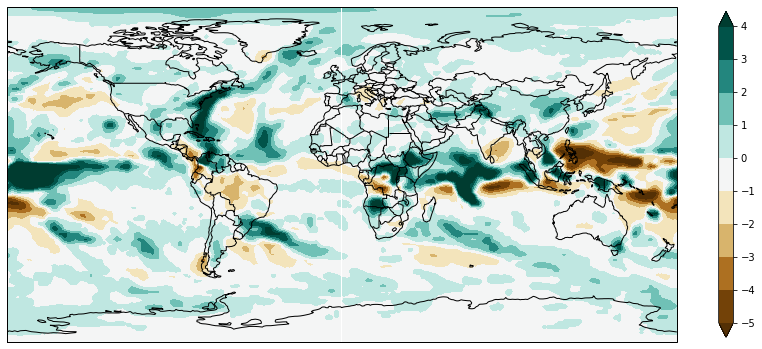

In [45]:
fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
                        
contour = ax.contourf(lon, lat, var*60*60*24, levels = np.arange(-5,5,1),
                      transform=ccrs.PlateCarree(),cmap = plt.get_cmap('BrBG'), extend='both')

fig.colorbar(contour, shrink = 0.6, orientation = 'vertical')
            
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)

In [8]:
#file = xr.open_dataset('dadosiri/NovIC_nmme_precip_anom_stdanom.nc', decode_times=False)

variaveis = ['precip', 'tmp2m', 'tmpsfc', 'anom']



for name in os.listdir(". ./dados/CFSv2"):
    if name.endswith(".nc"):
        #print(os.path.join("dadosiri", file))
        file = xr.open_dataset(os.path.join("dadosiri", name), decode_times=False)
        
        lat = file['lat'][:]
        lon = file['lon'][:]
        
#         for a in file.data_vars:
#             if a in variaveis:
#                 var = file[a][0,:,:]
        
        for a in file.data_vars:
            if a in variaveis:
                print(name)
                try:
                    var = file[a][0,:,:]

                    cvar, clon = add_cyclic_point(var.values, coord=lon, axis=1)
                except:
                    print('Teve erro em cima')

                try:
                    if a == 'anom':
                        fig = plt.figure(figsize=(15,10))

                        ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
                        
                        contour = ax.contourf(clon, lat, cvar, levels = np.arange(0,10,0.5),
                                    transform=ccrs.PlateCarree(),cmap = plt.get_cmap('Spectral'), extend='both')
#                         fig.colorbar(contour, shrink = 0.6, orientation = "vertical")
                    elif a == 'precip':
                        fig = plt.figure(figsize=(15,10))

                        ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
        
                        contour = ax.contourf(clon, lat, cvar, levels = np.arange(0,20,1),
                                    transform=ccrs.PlateCarree(),cmap = plt.get_cmap('Blues'), extend='both')
#                         fig.colorbar(contour, shrink = 0.6, orientation = "vertical")
                    else:
                        fig = plt.figure(figsize=(15,10))

                        ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
        
                        contour = ax.contourf(clon, lat, cvar, levels = np.arange(0,60,1),
                                    transform=ccrs.PlateCarree(),cmap = plt.get_cmap('BuPu'), extend='both')
#                         fig.colorbar(contour, shrink = 0.6, orientation = "vertical")
                        
                    
                    fig.colorbar(contour, shrink = 0.6, orientation = 'vertical')
            
                    ax.add_feature(cfeature.BORDERS)
                    ax.add_feature(cfeature.COASTLINE)
        
                    path = 'graficos/' + name[:-3] + '/'
                    if not os.path.exists(path):
                        os.makedirs(path)

                    fig.savefig(path+a, dpi=300)
                    plt.close('all')
                    
                except:
                    print("Houve erro no arquivo "+ name)
                
        
        

NovIC_cfsv2_precip_anom_stdanom.nc
NovIC_cfsv2_precip_anom_stdanom.nc
NovIC_cfsv2_tmp2m_anom_stdanom.nc
NovIC_cfsv2_tmp2m_anom_stdanom.nc
NovIC_cfsv2_tmpsfc_anom_stdanom.nc
NovIC_cfsv2_tmpsfc_anom_stdanom.nc
NovIC_cmc1_tmp2m_anom_stdanom.nc
NovIC_cmc1_tmp2m_anom_stdanom.nc
NovIC_cmc1_tmpsfc_anom_stdanom.nc
NovIC_cmc1_tmpsfc_anom_stdanom.nc
NovIC_cmc2_precip_anom_stdanom.nc
NovIC_cmc2_precip_anom_stdanom.nc
NovIC_cmc2_tmp2m_anom_stdanom.nc
NovIC_cmc2_tmp2m_anom_stdanom.nc
NovIC_gfdl_flor_precip_anom_stdanom.nc
NovIC_gfdl_flor_precip_anom_stdanom.nc
NovIC_gfdl_flor_tmp2m_anom_stdanom.nc
NovIC_gfdl_flor_tmp2m_anom_stdanom.nc
NovIC_gfdl_flor_tmpsfc_anom_stdanom.nc
NovIC_gfdl_flor_tmpsfc_anom_stdanom.nc
NovIC_gfdl_precip_anom_stdanom.nc
NovIC_gfdl_precip_anom_stdanom.nc
NovIC_gfdl_tmp2m_anom_stdanom.nc
NovIC_gfdl_tmp2m_anom_stdanom.nc
NovIC_gfdl_tmpsfc_anom_stdanom.nc
NovIC_gfdl_tmpsfc_anom_stdanom.nc
NovIC_nasa_precip_anom_stdanom.nc
NovIC_nasa_precip_anom_stdanom.nc
NovIC_nasa_tmp2m_anom_

TopologyException: side location conflict at 257.99999999999994 -74


Houve erro no arquivo NovIC_nasa_tmpsfc_anom_stdanom.nc
NovIC_nasa_tmpsfc_anom_stdanom.nc


TopologyException: side location conflict at -57.000000000000121 -35


Houve erro no arquivo NovIC_nasa_tmpsfc_anom_stdanom.nc
NovIC_ncar_ccsm4_precip_anom_stdanom.nc
NovIC_ncar_ccsm4_precip_anom_stdanom.nc
NovIC_ncar_ccsm4_tmp2m_anom_stdanom.nc
NovIC_ncar_ccsm4_tmp2m_anom_stdanom.nc
NovIC_ncar_ccsm4_tmpsfc_anom_stdanom.nc
NovIC_ncar_ccsm4_tmpsfc_anom_stdanom.nc
NovIC_nmme_precip_anom_stdanom.nc
NovIC_nmme_precip_anom_stdanom.nc
NovIC_nmme_tmp2m_anom_stdanom.nc
NovIC_nmme_tmp2m_anom_stdanom.nc
NovIC_nmme_tmpsfc_anom_stdanom.nc
NovIC_nmme_tmpsfc_anom_stdanom.nc


In [34]:
print(file)

<xarray.Dataset>
Dimensions:  (lat: 181, lon: 360, time: 6)
Coordinates:
  * time     (time) float64 1.737e+07 1.737e+07 ... 1.737e+07 1.737e+07
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
Data variables:
    tmpsfc   (time, lat, lon) float32 ...
    anom     (time, lat, lon) float32 ...
    stdan    (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.4rc1 (http://mpimet.mpg....
    Conventions:  CF-1.6
    history:      Mon Dec 17 14:00:36 2018: cdo -f nc import_binary NovIC_nmm...
    CDO:          Climate Data Operators version 1.9.4rc1 (http://mpimet.mpg....


In [20]:
# file

lat = file['lat'][:]
lon = file['lon'][:]
var = file['precip'][:,:,:]

In [10]:
cvar, clon = add_cyclic_point(var[0,:,:].values, coord=lon, axis=1)

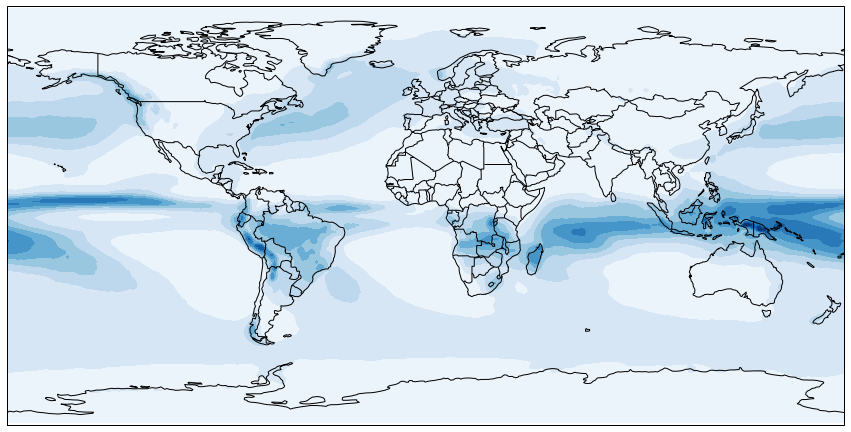

In [22]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111,projection=ccrs.PlateCarree())

ax.contourf(clon, lat, cvar, levels = np.arange(0,20,2) ,
              transform=ccrs.PlateCarree(),cmap = plt.get_cmap('Blues'), extend='both')

ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)

/home/aluno/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


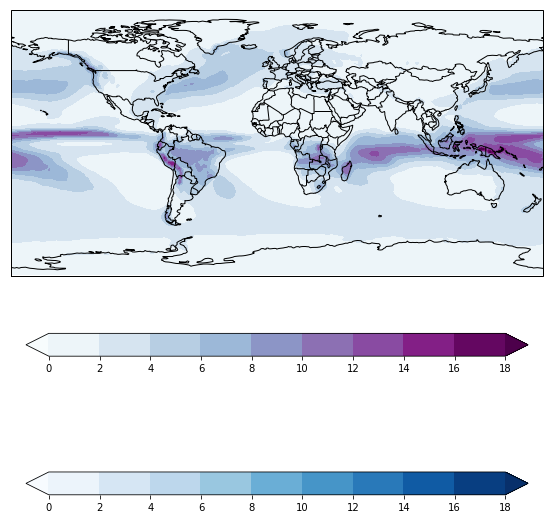

In [22]:
#fig = plt.figure(figsize=(15,10))
#interval = np.arange(0,5.25,0.25)
#ax = fig.add_subplot(211)
#ax = plt.axes(projection=ccrs.PlateCarree())
# ax.contourf(lon, lat, sst, 60,
#              transform=ccrs.PlateCarree(), cmap = plt.get_cmap('Accent'),extend='max')
#contour = ax.contourf(clon, lat, cvar, levels = np.arange(0,20,2) ,
#              transform=ccrs.PlateCarree(),cmap = plt.get_cmap('Blues'), extend='both')
#fig.colorbar(contour, shrink = 0.6, orientation = 'horizontal')
#ax2 = fig.add_subplot(212)
#ax2 = plt.axes(projection=ccrs.PlateCarree())
#contour2 = ax2.contourf(clon, lat, cvar, levels = np.arange(0,20,2) ,
#              transform=ccrs.PlateCarree(),cmap = plt.get_cmap('BuPu'), extend='both')
#fig.colorbar(contour2, shrink = 0.6, orientation = 'horizontal')
# ax.coastlines()
#ax.add_feature(cfeature.BORDERS)
#ax.add_feature(cfeature.COASTLINE)

# Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, 
# CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, 
# OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r,
# Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd,
# PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r,
# RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral,
# Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr,
# YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone,
# bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, 
# copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray,
# gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, 
# gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, 
# gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, 
# nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, 
# seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, 
# tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, winter, winter_r